# Cours PCD – Labo 2 : Détection de données aberrantes (outliers)

Dans le cadre de ce laboratoire il nous a été demandé de trouver les données atypiques (ou aberrantes) dans plusieurs jeux de données en appliquant la méthode LOF.  Ces jeux de données sont disponibles en ligne et comportent une annotation des données atypiques.  Cette annotation va nous permettre d’évaluer la méthode LOF en calculant son score F1, avec divers paramètres, sur chaque jeu.

In [144]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from os import path
from scipy.io import arff

from sklearn.neighbors import LocalOutlierFactor

## Chemins des données

In [145]:
data_folder = "data/literature/"

In [146]:
data_files = {
    "aloi": "ALOI/ALOI_withoutdupl_norm.arff",
    "glass": "Glass/Glass_withoutdupl_norm.arff",
    "ionosphere": "Ionosphere/Ionosphere_withoutdupl_norm.arff"
}

## Fonctions

In [161]:
def arff_to_dataframe(data_path):
    return pd.DataFrame(arff.loadarff(data_path)[0])

In [160]:
def outlier_report(df):
    df_outlier_counts = df["outlier"].value_counts()
    n_inliers  = df_outlier_counts[b"no"]
    n_outliers = df_outlier_counts[b"yes"]
    
    print(f"Nombre de valeurs :\t{len(df)}")
    print(f"Nombre d'inliers  :\t{n_inliers}")
    print(f"Nombre d'outliers :\t{n_outliers}")
    
    return n_outliers / len(df)

## 1. Détermination du plus petit jeu de données

À première vue on constate que jeu de données "Glass" est le plus petit en termes de taille de fichier :

```shell
$ du -h
19M	./ALOI
20K	./Glass
88K	./Ionosphere
19M	.
```

Cela est confirmé par le nombre de lignes dans chaque DataFrame chargé :

In [149]:
for (data_name, data_file) in data_files.items():
    print(f"{data_name:20}: {len(arff_to_dataframe(path.join(data_folder, data_file)))}")

aloi                : 49534
glass               : 214
ionosphere          : 351


## 2. Nature des données

### ALOI
ALOI est ....

In [150]:
aloi = arff_to_dataframe(path.join(data_folder, data_files["aloi"]))
outlier_report(aloi)
aloi

Nombre de valeurs :	49534
Nombre d'inliers  :	48026
Nombre d'outliers :	1508


,att1,att2,att3,att4,att5,att6,att7,att8,att9,att10,...,att20,att21,att22,att23,att24,att25,att26,att27,outlier,id
0,0.784999,0.000018,0.000000,0.000093,0.000000,0.000000,0.0,0.000000,0.000000,0.139811,...,0.001189,0.0,0.115728,0.023449,0.000200,0.000220,0.034952,0.046914,b'yes',1.0
1,0.958088,0.000000,0.000000,0.001671,0.000000,0.000000,0.0,0.000000,0.000000,0.019556,...,0.000000,0.0,0.022035,0.007516,0.000000,0.000000,0.001033,0.000000,b'yes',2.0
2,0.938768,0.000000,0.000000,0.005146,0.000000,0.000000,0.0,0.000000,0.000000,0.018451,...,0.000000,0.0,0.035542,0.011982,0.000000,0.001595,0.019520,0.000000,b'yes',3.0
3,0.954775,0.000000,0.000000,0.001427,0.000000,0.000000,0.0,0.000000,0.000000,0.024944,...,0.000000,0.0,0.019941,0.000805,0.000000,0.000000,0.000035,0.000000,b'yes',4.0
4,0.933601,0.000000,0.000000,0.001682,0.000000,0.000000,0.0,0.000000,0.000000,0.037002,...,0.000000,0.0,0.046759,0.002663,0.000000,0.000339,0.001359,0.000000,b'yes',5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49529,0.945860,0.001296,0.000000,0.001334,0.001894,0.000021,0.0,0.000000,0.000000,0.002072,...,0.000000,0.0,0.000195,0.000805,0.000040,0.000174,0.024223,0.013462,b'no',49996.0
49530,0.956965,0.001921,0.000000,0.001856,0.002696,0.000064,0.0,0.000000,0.000000,0.002280,...,0.000000,0.0,0.000174,0.000387,0.000000,0.000193,0.024315,0.005990,b'no',49997.0
49531,0.966346,0.002729,0.000000,0.002170,0.002857,0.000107,0.0,0.000083,0.000000,0.001382,...,0.000000,0.0,0.000246,0.000709,0.000000,0.000211,0.018509,0.006266,b'no',49998.0
49532,0.968409,0.003372,0.000026,0.000731,0.002616,0.000384,0.0,0.000083,0.000078,0.000986,...,0.000000,0.0,0.000482,0.000752,0.000521,0.000266,0.017941,0.007500,b'no',49999.0


Cela correspond aux valeurs du site web: 48026 inliers et 1508 outliers

### Glass
Glass est un ensemble de données médico-légales décrivant les types de verre. Cette version est basée sur une publication de Keller et al. (HiCS, [1]). Les auteurs utilisent la classe 6 (minoritaire) comme outlier et toutes les autres classes comme inliers. Malheureusement, ils ne détaillent pas les attributs qui ont été utilisés. L'ensemble de données d'origine se compose de 9 attributs, ici seuls 7 attributs sont présents. L'ensemble de données contient 214 instances, 9 valeurs aberrantes (21,4 %) et 205 inliers (95,79 %). Cet ensemble de données ne contient qu'un seul doublon, donc une version sans doublon n'est pas créer.

In [151]:
glass = arff_to_dataframe(path.join(data_folder, data_files["glass"]))
outlier_report(glass)
glass

Nombre de valeurs :	214
Nombre d'inliers  :	205
Nombre d'outliers :	9


,var_0000,var_0001,var_0002,var_0003,var_0004,var_0005,var_0006,id,outlier
0,0.467651,0.321584,0.768880,0.246630,0.838799,0.099737,0.298340,1.0,b'no'
1,0.496412,0.220491,0.776032,0.316598,0.919973,0.089145,0.279479,2.0,b'no'
2,0.519133,0.404464,0.768012,0.334978,0.801622,0.092369,0.271238,3.0,b'no'
3,0.199650,0.547373,0.374284,0.362223,0.817017,0.000000,0.177913,4.0,b'yes'
4,0.847261,0.286361,0.000000,0.217792,0.000000,0.019135,1.000000,5.0,b'no'
...,...,...,...,...,...,...,...,...,...
209,0.495555,0.438735,0.749682,0.277775,0.791251,0.092286,0.260617,210.0,b'no'
210,0.515273,0.346053,0.777602,0.548135,0.863624,0.108131,0.230353,211.0,b'no'
211,0.459787,0.517479,0.773646,0.285545,0.761141,0.057688,0.223982,212.0,b'no'
212,0.442959,0.297568,0.631711,0.421653,0.884864,0.113589,0.276465,213.0,b'no'


Cela correspond aux valeurs du site web: 205 inliers et 9 outliers

### Ionosphere

Cet ensemble de données différencie les bons radars qui montrent des preuves d'une sorte de structure dans l'ionosphère, et les mauvais radars pour lesquels les signaux traversent le radar. Dans cette version (HiCS, [1]), les auteurs utilisent la classe b (minoritaire) comme outliers et la classe g comme inliers. Ils ont supprimé les attributs 1 et 2 de leur jeu de données. Par conséquent, après le prétraitement, cet ensemble de données a 32 attributs numériques et 351 instances, 126 outliers (35,9 %) et 225 inliers (64,1 %). Cet ensemble de données ne contient qu'un seul doublon, donc une version sans doublon n'est pas créer.

In [152]:
ionosphere = arff_to_dataframe(path.join(data_folder, data_files["ionosphere"]))
outlier_report(ionosphere)

Nombre de valeurs :	351
Nombre d'inliers  :	225
Nombre d'outliers :	126


0.358974358974359

Cela correspond aux valeurs du site web: 225 inliers et 126 outliers

## 3. Détection avec Local Outlier Factor (LOF)

In [153]:
sample = glass[["var_0000", "var_0001"]]

In [154]:
clf = LocalOutlierFactor()

In [155]:
pred = clf.fit_predict(sample)
scores = clf.negative_outlier_factor_

In [156]:
in_sample  = sample.loc[np.where(pred ==  1)]
out_sample = sample.loc[np.where(pred == -1)]

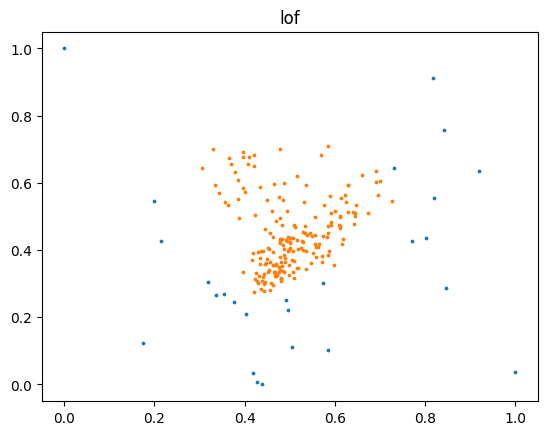

In [157]:
plt.title("lof")
plt.scatter(in_sample["var_0000"], in_sample["var_0001"], color="tab:orange", s=3.0, label="inlier points")
plt.scatter(out_sample["var_0000"], out_sample["var_0001"], color="tab:blue",  s=3.0, label="outlier points")